<a href="https://colab.research.google.com/github/Juhyeon-creater/Sessac-project2/blob/main/Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
import pandas as pd

# CSV 경로
csv_path = r"/content/drive/MyDrive/shared_googledrive(Sessac Final Project)/dataset/Hundred/GW_YOLO_MPU_Data_Log_20251119.csv"

# 1. CSV 불러오기
df = pd.read_csv(csv_path)

# 2. MPU 데이터 없는 행 제거
df = df.dropna(subset=["MPU_Pelvis_Status"])

# 3. YOLO BAD → 1, GOOD → 0
df["YOLO_Bad"] = df["YOLO_Status"].apply(lambda x: 1 if "BAD" in str(x) else 0)

# 4. Pelvis Down → LEFT DOWN or RIGHT DOWN이면 1, LEVEL이면 0
def pelvis_to_binary(x):
    x = str(x).upper()
    if "LEFT DOWN" in x or "RIGHT DOWN" in x:
        return 1
    return 0

df["Pelvis_Down"] = df["MPU_Pelvis_Status"].apply(pelvis_to_binary)

# 5. 상관계수 계산
corr = df[["YOLO_Bad", "Pelvis_Down"]].corr().iloc[0, 1]

print("========== RESULT ==========")
print("YOLO Bad ↔ Pelvis Down 상관계수:", round(corr, 3))
print("============================")

# 6. 샘플 10행 출력
print("\n[확인용 데이터 일부]")
print(df[["YOLO_Status", "YOLO_Bad", "MPU_Pelvis_Status", "Pelvis_Down"]].head(10))


========== RESULT ==========
YOLO Bad ↔ Pelvis Down 상관계수: -0.028

[확인용 데이터 일부]
    YOLO_Status  YOLO_Bad  MPU_Pelvis_Status  Pelvis_Down
33   BAD (3.6°)         1  Pelvis: LEFT DOWN            1
35   BAD (1.1°)         1  Pelvis: LEFT DOWN            1
39   BAD (0.9°)         1  Pelvis: LEFT DOWN            1
41  BAD (-0.6°)         1  Pelvis: LEFT DOWN            1
42  BAD (-0.1°)         1  Pelvis: LEFT DOWN            1
43  BAD (-0.7°)         1  Pelvis: LEFT DOWN            1
47  BAD (-0.5°)         1  Pelvis: LEFT DOWN            1
50  BAD (-1.0°)         1  Pelvis: LEFT DOWN            1
53  BAD (-1.5°)         1  Pelvis: LEFT DOWN            1
54  BAD (-0.4°)         1  Pelvis: LEFT DOWN            1


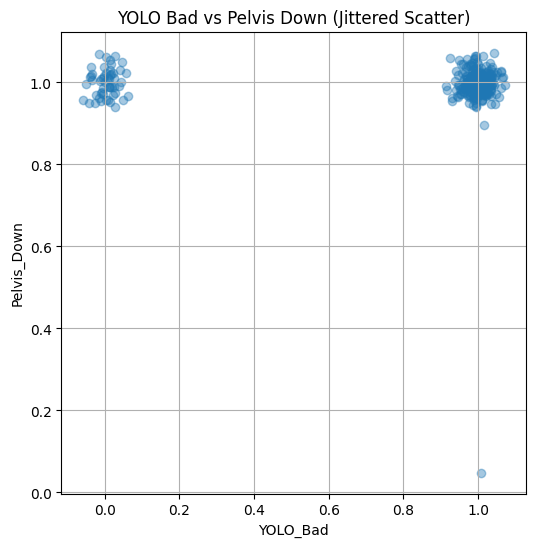

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# 지터 추가
x = df["YOLO_Bad"] + np.random.normal(0, 0.03, len(df))
y = df["Pelvis_Down"] + np.random.normal(0, 0.03, len(df))

plt.figure(figsize=(6,6))
plt.scatter(x, y, alpha=0.4)
plt.title("YOLO Bad vs Pelvis Down (Jittered Scatter)")
plt.xlabel("YOLO_Bad")
plt.ylabel("Pelvis_Down")
plt.grid(True)
plt.show()


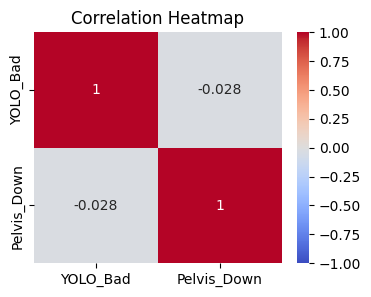

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[["YOLO_Bad", "Pelvis_Down"]].corr()

plt.figure(figsize=(4,3))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()
